In [1]:
import os
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import sys
import seaborn as sns # 시본 임포트

from config import DATA_PATH

In [3]:
data_paths = glob(os.path.join(DATA_PATH, '*', 'total_log.csv'))
margin = 500
all_df = pd.DataFrame()
margin_df = pd.DataFrame()

for path in data_paths:
    if ('41354' in path) | ('40844' in path):
        df = pd.read_csv(path)
        # print(df.shape)
        # print(df.columns)
        series = df[(df['TarGear'] - df['TarGear'].shift())==-1]['TarGear'].isin([1])
        true_index = series[series==True].index
        
        for idx in true_index:
            down_df = pd.DataFrame(df.loc[idx:idx+margin])
            down_df = down_df.drop(down_df[down_df['DriveMode']==2].index)
            if (0 in down_df['VehSpdClu'].unique()) & (down_df['VehSpdClu'].values[-1]<5):
                all_df = pd.concat([all_df, df.loc[idx].to_frame().T])
                margin_df = pd.concat([margin_df, df.loc[idx:idx+margin]])
    
all_df = all_df.loc[:,:'VehSpdClu']
corr_df = margin_df.loc[:,:'VehSpdClu'].corr(method='pearson')#.fillna(0)
'''
sns.set()#font_scale=1.0)

plt.figure(figsize=(30,30))
test_heatmap = sns.heatmap(corr_df.values, # 데이터
                          cbar = True, # 오른쪽 컬러 막대 출력 여부
                           annot = True, # 차트에 숫자를 보여줄 것인지 여부
                          annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
                           fmt = '.2f', # 숫자의 출력 소수점자리 개수 조절
                           square = 'True', # 차트를 정사각형으로 할 것인지
                          yticklabels=corr_df.columns.values, # y축에 컬럼명 출력
                          xticklabels=corr_df.columns.values) # x축에 컬럼명 출력
plt.tight_layout()
plt.show()
'''
x = all_df['VehSpdClu'].values
y = all_df['TarGear'].values

fig = px.density_heatmap(data_frame=all_df, x="VehSpdClu", y="TarGear", text_auto=True, color_continuous_scale='Viridis')

fig.show()
sys.exit()

SystemExit: 

/home/imlab/anaconda3/envs/anomaly/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



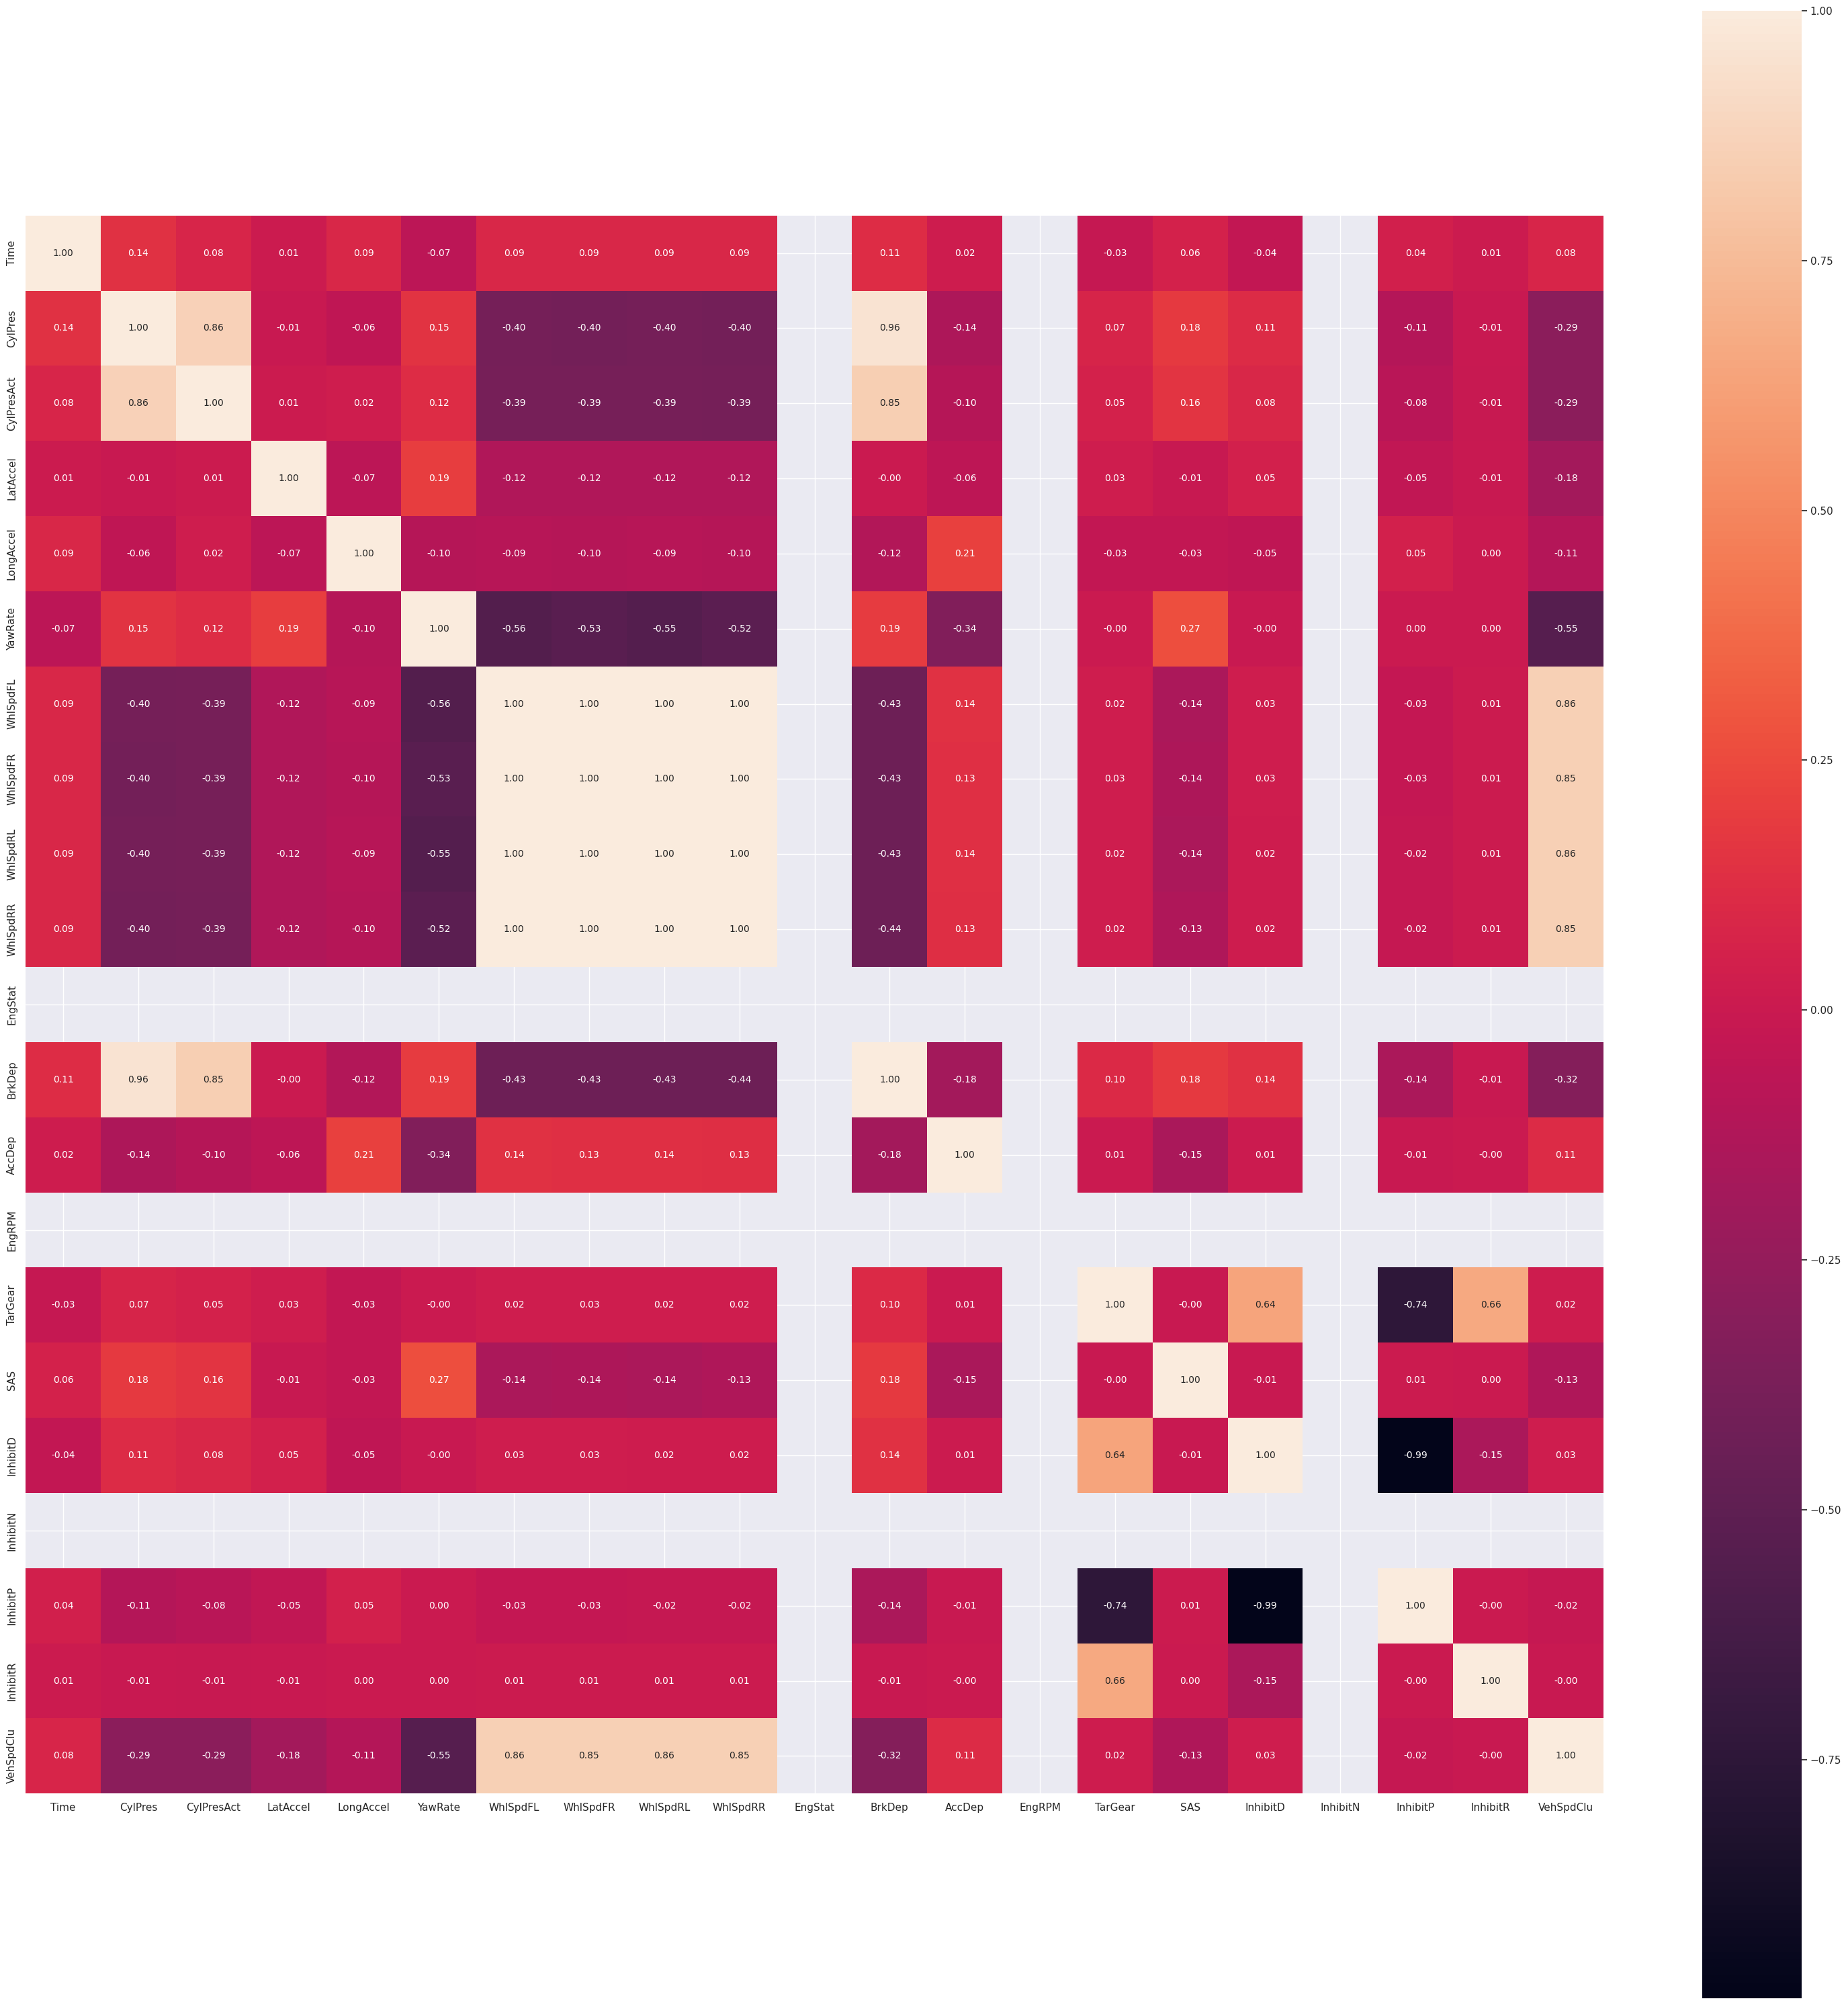

SystemExit: 

/home/imlab/anaconda3/envs/anomaly/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [5]:
all_df = pd.DataFrame()
margin_df = pd.DataFrame()

for path in data_paths:
    if not ('41354' in path) | ('40844' in path):
        df = pd.read_csv(path)
        # print(df.shape)
        # print(df.columns)
        series = df[(df['TarGear'] - df['TarGear'].shift())==-1]['TarGear'].isin([1])
        true_index = series[series==True].index
        
        for idx in true_index:
            down_df = pd.DataFrame(df.loc[idx:idx+margin])
            down_df = down_df.drop(down_df[down_df['DriveMode']==2].index)
            if (0 in down_df['VehSpdClu'].unique()) & (down_df['VehSpdClu'].values[-1]<5):
                all_df = pd.concat([all_df, df.loc[idx].to_frame().T])
                margin_df = pd.concat([margin_df, df.loc[idx:idx+margin]])

all_df = all_df.loc[:,:'VehSpdClu']
corr_df = margin_df.loc[:,:'VehSpdClu'].corr(method='pearson')#.fillna(0)

sns.set()#font_scale=1.0)

plt.figure(figsize=(30,30))
test_heatmap = sns.heatmap(corr_df.values, # 데이터
                          cbar = True, # 오른쪽 컬러 막대 출력 여부
                           annot = True, # 차트에 숫자를 보여줄 것인지 여부
                          annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
                           fmt = '.2f', # 숫자의 출력 소수점자리 개수 조절
                           square = 'True', # 차트를 정사각형으로 할 것인지
                          yticklabels=corr_df.columns.values, # y축에 컬럼명 출력
                          xticklabels=corr_df.columns.values) # x축에 컬럼명 출력
plt.tight_layout()
plt.show()

x = all_df['VehSpdClu'].values
y = all_df['TarGear'].values

fig = px.density_heatmap(data_frame=all_df, x="VehSpdClu", y="TarGear", text_auto=True, color_continuous_scale='Viridis')

fig.show()
sys.exit()